# Implementing and Running the One-step Actor-Critic (episodic)
### Page 332, Sutton's book

<img src="https://github.com/FredAmouzgar/RL-sutton/raw/master/ch13-PG_methods/One-step%20Actor-Critic%20(TF2.0)/images/Ch13_RL-Sutton_one-step-actor-critic.png" width=800>

## Training CartPole Environment

In [1]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm

%matplotlib inline

In [2]:
env = gym.make("CartPole-v1")
agent = Agent(state_size=env.observation_space.shape, action_size=env.action_space.n, env_name=env.spec.id) #4 ,2

print(f"env.action_space.n: {env.action_space.n}\nenv.observation_space.shape: {env.observation_space.shape}")

env.action_space.n: 2
env.observation_space.shape: (4,)


In [3]:
from time import sleep
import numpy as np
from IPython.display import clear_output

def render(img, status=False, rewards=[], reward_chart=True):
    message = "Episode over" if done else ""
    if reward_chart:
        fig, (ax1, ax2) = plt.subplots(1, 2)
    else:
        fig, ax1 = plt.subplots(1, 1)
    ax1.axis("off")
    _ = ax1.imshow(img)
    if reward_chart:
        _ = ax2.plot(rewards)
    
    plt.title(message)
    plt.show()
    clear_output(wait=True)

In [4]:
episodes = 500

all_rewards = []
for i in tqdm(range(episodes)):
    state = env.reset()
    agent.new_episode()
    done = False

    rewards = []
    while not done:
        # TODO: Agent has to choose an action here
        action = agent.act(state)
        state_, reward, done, _ = env.step(action)
        rewards.append(reward)
        agent.learn(state, action,state_,reward,done)
        if i % 100 == 0:
            render(env.render(mode="rgb_array"),status=done, rewards=all_rewards)
        state = state_
        if done:
            if all_rewards != [] and np.max(all_rewards) < np.sum(rewards):
                agent.save()
            all_rewards.append(np.sum(rewards))
env.close()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [08:40<00:00,  1.04s/it]


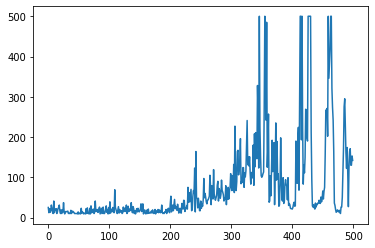

In [5]:
plt.plot(all_rewards)

# Watch a Smart Agent (?)

Not a very smart agent, though. It regularly backslides.

In [1]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm

%matplotlib inline

#######
from time import sleep
import numpy as np
from IPython.display import clear_output

def render(img, status=False, rewards=[], reward_chart=True):
    message = "Episode over" if done else ""
    if reward_chart:
        fig, (ax1, ax2) = plt.subplots(1, 2)
    else:
        fig, ax1 = plt.subplots(1, 1)
    ax1.axis("off")
    _ = ax1.imshow(img)
    if reward_chart:
        _ = ax2.plot(rewards)
    
    plt.title(message)
    plt.show()
    clear_output(wait=True)
#########

env = gym.make("CartPole-v1")
agent = Agent(state_size=4, action_size=2, env_name=env.spec.id)
agent.load()

episodes = 2

all_rewards = []
for i in tqdm(range(episodes)):
    state = env.reset()
    agent.new_episode()
    done = False

    rewards = []
    while not done:
        # TODO: Agent has to choose an action here
        action = agent.act(state)
        state_, reward, done, _ = env.step(action)
        rewards.append(reward)
        #agent.learn(state, action,state_,reward,done)
        render(env.render(mode="rgb_array"),status=done, rewards=all_rewards, reward_chart=False)
        state = state_
        if done:
            all_rewards.append(np.sum(rewards))

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:43<00:00, 21.89s/it]


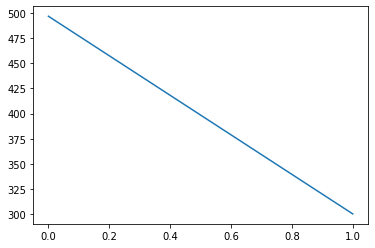

In [2]:
_ = plt.plot(all_rewards)
env.close()

## Training MountainCar Environment

In [7]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from agent import Agent
from tqdm import tqdm

%matplotlib inline

env = gym.make("MountainCar-v0")
agent = Agent(state_size=2, action_size=3, env_name=env.spec.id) #4 ,2

print(f"env.action_space.n: {env.action_space.n}\nenv.observation_space.shape: {env.observation_space.shape}")

env.action_space.n: 3
env.observation_space.shape: (2,)


In [8]:
from time import sleep
import numpy as np
from IPython.display import clear_output

def render(img, status=False, rewards=[], reward_chart=True):
    message = "Episode over" if done else ""
    if reward_chart:
        fig, (ax1, ax2) = plt.subplots(1, 2)
    else:
        fig, ax1 = plt.subplots(1, 1)
    ax1.axis("off")
    _ = ax1.imshow(img)
    if reward_chart:
        _ = ax2.plot(rewards)
    
    plt.title(message)
    plt.show()
    clear_output(wait=True)
    
episodes = 500

all_rewards = []
for i in tqdm(range(episodes)):
    state = env.reset()
    agent.new_episode()
    done = False

    rewards = []
    while not done:
        # TODO: Agent has to choose an action here
        action = agent.act(state)
        state_, reward, done, _ = env.step(action)
        rewards.append(reward)
        agent.learn(state, action,state_,reward,done)
        if i % 100 == 0:
            render(env.render(mode="rgb_array"),status=done, rewards=all_rewards)
        state = state_
        if done:
            if all_rewards != [] and np.max(all_rewards) < np.sum(rewards):
                agent.save()
            all_rewards.append(np.sum(rewards))
env.close()

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]


InvalidArgumentError: Matrix size-incompatible: In[0]: [1,2], In[1]: [4,50] [Op:MatMul]

----
# Some Tests Before Development:

In [3]:
from agent import Agent

agent = Agent(state_size=4, action_size=2)

In [13]:
env.spec.id

'CartPole-v1'

In [6]:
env = gym.make("MountainCar-v0")
print(f"env.action_space.n: {env.action_space.n}\nenv.observation_space.shape: {env.observation_space.shape}")
s = env.reset()

env.action_space.n: 3
env.observation_space.shape: (2,)


In [ ]:
s = s.reshape(1,4)
s = tf.convert_to_tensor(s, dtype=tf.float32)
print(s.shape)
print(s)

action_probs = agent.actor(s)
print(action_probs)

agent.critic(s)

In [ ]:
s = env.reset()
agent.act(s)

In [ ]:
for i in range(10):
    print(tf.random.categorical(action_probs, 1))
    print(agent.act(s))

In [ ]:
action_probs

In [ ]:
env.step(0)

In [ ]:
1 - True

In [ ]:
tf.__version__

In [ ]:
import tensorflow_probability as tfp

In [ ]:
dist = tfp.distributions.Categorical(probs=action_probs)

In [ ]:
dist.log_prob(action)

In [ ]:
weights = agent.critic.weights
print(weights[3].shape)
#for w in weights[0]:
#    print(w)